# Python Project - Team 5Py 

# (Ayushi Bhatnagar, Mona , Lavit Hingorani, Saket Sharan, Shobhit Gupta)

## Music Recommendation Project 
## Fact Discovery, Sentiment Analysis and Predictive modelling (Logistic Regression)

### About the data set:

* MARD: Multimodal Album Reviews Dataset 

MARD contains texts and accompanying metadata originally obtained from a much larger dataset of Amazon customer reviews, which have been enriched with music metadata from MusicBrainz, and audio descriptors from AcousticBrainz. MARD amounts to a total of 65,566 albums and 263,525 customer reviews. The description of the contents of the text files are as follows:

**mard_metadata.json:**

In this file there is an entry per album. Depending on the album, the following fields may be available or not. The list of possible fields per entry: 

Source: Amazon 

amazon-id: The Amazon product id. You can visualize the album page in amazon adding this id to the following url "www.amazon.com/dp/" ||
artist: The artist name as it appears in Amazon ||
title: The album title as it appears in Amazon || 
related: 
    also bought: Other products bought by people who bought this album 
    buy_after_viewing: Other products bought by people after viewing this album ||
price: The album price ||
label: The record label of the album ||
categories: The genre categories in Amazon ||
sales_rank: Ranking in the Amazon music sales rank ||
imUrl: Url of the album cover ||
artist_url: The url of the artist page in amazon. You must add "www.amazon.com" at the beginning to access this page ||
root-genre: The root genre category of the album, extracted from the categories field.

Source: MusicBrainz 

artist-mbid: The MusicBrainz ID of the artist ||
first-release-year: The year of first publication of the album ||
release-group-mbid: The MusicBrainz ID of the release group mapped to this album title ||
release-group: The MusicBrainz ID of the first release in the release-group of this album, used to extract the tracks info ||
songs: List of tracks in the album 
    ftitle: Title of the track 
    fmbid: MusicBrainz recording ID of the track. Used to map with AcousticBrainz. 


** mard_reviews.json:**

The file containing the reviews text with some metadata associated to each review. Each entry has the following fields: reviewerID, amazon-id, reviewerName, helpful, reviewText, overall, summary, unixReviewTime, reviewTime. 


Source: http://mtg.upf.edu/download/datasets/mard

********************

**Loading the data into dataframes:**

We used MongoClient to convert the Json file into a csv file:

* import command:

mongoimport --db Music -c Metadata --mard_metadata.json

mongoimport --db Music -c Reviews --mard_reviews.json

* export command:

mongoexport --db Music--collection Metadata --type csv --fields "_id", "release-mbid", "artist-mbid", "imUrl", "confidence", "related", "salesRank", "categories", "release-group-mbid", "amazon-id", "root-genre", "title",	"artist", "label",	"artist_url", "first-release-year", "songs", "price" --out C:\MSIS\UnStructuredData\metadata.csv


mongoexport --db Music--collection Metadata --type csv --fields "_id", "reviewerID", "amazon-id",	"reviewerName", "helpful", "unixReviewTime", "reviewText", "overall", "reviewTime", "summary" --out C:\MSIS\UnStructuredData\review.csv

* We got **metadata.csv and review.csv**:

We loaded the csv  into dataframes using pandas read_csv function

*****************

In [49]:
# need to import the numpy and pandas library
import numpy as np
import pandas as pd

In [50]:
# need to import the numpy and pandas library
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

In [64]:
col_names = ['_id','release_mbid', 'artist_mbid', 'imUrl','confidence','related','salesRank', 'categories','release_group_mbid','amazon_id','root_genre','title','artist','label','artist_url','first_release_year','songs','price']
df_metadata = pd.read_csv('~/Desktop/metadata.csv', delimiter = ','  , names = col_names, header = None )

df_metadata.head()

,_id,release_mbid,artist_mbid,imUrl,confidence,related,salesRank,categories,release_group_mbid,amazon_id,root_genre,title,artist,label,artist_url,first_release_year,songs,price
0,_id,release-mbid,artist-mbid,imUrl,confidence,related,salesRank,categories,release-group-mbid,amazon-id,root-genre,title,artist,label,artist_url,first-release-year,songs,price
1,ObjectId(58b3624c54e8aa4aa94055a2),NaN,NaN,http://ecx.images-amazon.com/images/I/217zrfsw...,NaN,NaN,"{""Music"":776497}","[[""CDs \u0026 Vinyl"",""Alternative Rock""]]",NaN,B00000007O,Alternative Rock,Stories of the New West,Kent 3,Super Electro,/Kent-3/e/B000APW5GM,NaN,NaN,16.18
2,ObjectId(58b3624c54e8aa4aa94055a3),NaN,NaN,http://ecx.images-amazon.com/images/I/51rKlhSe...,NaN,NaN,"{""Music"":902130}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Ameri...",NaN,1902593375,Alternative Rock,Become the Media,Jello Biafra,AK Press,/Jello-Biafra/e/B000APYL8M,NaN,NaN,29.98
3,ObjectId(58b3624c54e8aa4aa94055a4),359b564b-3db4-44ad-9481-0b45f24aa53e,6ce5815b-b277-48b0-94c9-a87a8f0422b3,http://ecx.images-amazon.com/images/I/6139OLQU...,1,NaN,NaN,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,26197898,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
4,ObjectId(58b3624c54e8aa4aa94055a5),NaN,NaN,http://ecx.images-amazon.com/images/I/51XGHATB...,NaN,NaN,"{""Music"":652770}","[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Hardc...",NaN,B0000005U9,Alternative Rock,Live at Electric Ballroom,Vicious White Kids,Receiver/Smg,/Vicious-White-Kids/e/B000APYAWE,NaN,NaN,NaN


In [89]:
df_metadata.shape

(65567, 18)

In [65]:
col_names =  ['_id','reviewerID', 'amazon_id', 'reviewerName','helpful', 'unixReviewTime', 'reviewText','overall','reviewTime','summary']
df_review = pd.read_csv('~/Desktop/review.csv', delimiter = ','  , names = col_names, header = None )

df_review.head()

,_id,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,_id,reviewerID,amazon-id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
1,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!
2,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier
3,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!
4,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands


In [91]:
df_review.shape

(263526, 10)

** Cleaning the Data in the DataFrames:**

First, we get rid of the additional rows and columns that were not required for our analysis.(using drop function)

*****************

In [66]:
df_metadata_copy = df_metadata
df_metadata_copy = df_metadata_copy.drop([0])

df_review_copy = df_review
df_review_copy = df_review_copy.drop([0])

#df_metadata_copy
df_review_copy.head()


,_id,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
1,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!
2,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier
3,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!
4,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands
5,ObjectId(58b362c054e8aa4aa94155c4),A1KGXC7IRLVJR3,615205399,"Amy Elizabeth ""Amy""","[0,0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!


** Merge Data on the basis of Amazon_id (Using left merge)**

In [67]:
result = df_review_copy.merge(df_metadata_copy, on='amazon_id', how = 'left')
result.head()

,_id_x,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,categories,release_group_mbid,root_genre,title,artist,label,artist_url,first_release_year,songs,price
0,ObjectId(58b362c054e8aa4aa94155c0),A1BT6LQ9NY6RO3,615205399,"Jasa Swaze ""Jasa Swaze""","[1,1]",1214352000,I am a beginner and have tried a couple of med...,5,"06 25, 2008",Change Your LIfe for the Better!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
1,ObjectId(58b362c054e8aa4aa94155c1),A206OKO2FE2IPL,615205399,J. Jenson,"[1,1]",1229212800,This is coming from a person that didn't belie...,5,"12 14, 2008",Mediation couldn't get any easier,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN
2,ObjectId(58b362c054e8aa4aa94155c2),A1OFY4ATO7D13W,26197898,"Jacob Shepich ""Neo-Luddite""","[2,2]",1355702400,Buy this album. Now. Don't worry about the re...,5,"12 17, 2012",PITCHFORK Eat your heart out!,...,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
3,ObjectId(58b362c054e8aa4aa94155c3),A2KH83L1F70QR8,26197898,"John Stockton ""JLS""","[1,1]",1358121600,The Sudden Passion did a great job with this o...,5,"01 14, 2013",Americana from the Southlands,...,"[[""CDs \u0026 Vinyl"",""Alternative Rock"",""Indie...",b05be7e9-6bc4-422b-8198-32945b0d1c76,Alternative Rock,Southern Fashion,The Sudden Passion,Black Hearts & Pink Parts Records,/s?ie=UTF8&field-artist=The+Sudden+Passion&sea...,2012,"[{""mbid"":""308af531-5fa7-4dd8-969c-6bb7a204eb19...",14.23
4,ObjectId(58b362c054e8aa4aa94155c4),A1KGXC7IRLVJR3,615205399,"Amy Elizabeth ""Amy""","[0,0]",1214438400,I received this CD as a gift a few weeks ago f...,5,"06 26, 2008",It really works!,...,"[[""CDs \u0026 Vinyl"",""New Age"",""Meditation""],[...",NaN,New Age,Meditation For Success: In Body & Mind Rejuven...,Michael Midkiff,Kona Prince,/s?ie=UTF8&field-artist=Michael+Midkiff&search...,NaN,NaN,NaN



Since merge gave us few NaN values, we removed any NaN value in the result set using dropna function



In [68]:
cleanResult = result.dropna(how='any')

cleanResult.head()

,_id_x,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,categories,release_group_mbid,root_genre,title,artist,label,artist_url,first_release_year,songs,price
195,ObjectId(58b362c054e8aa4aa9415683),A2I91CUY72DWU1,1557252920,"Rev. Ben Cox ""revben""","[13,13]",1274486400,When I was in Music School at Stetson Universi...,5,"05 22, 2010",A Great Teaching tool,...,"[[""CDs \u0026 Vinyl"",""Classical"",""Sacred \u002...",189c37fb-29c6-4727-a04b-69286e2e7172,Classical,Learning About Gregorian Chant,Monastic Choir of Solesmes,Solesmes,/s?ie=UTF8&field-artist=Monastic+Choir+of+Sole...,2002,"[{""mbid"":""05c87acd-bd9b-431c-82e0-3f23f5679fa5...",15
1633,ObjectId(58b362c154e8aa4aa9415c21),A2ZMSGTCOKKFEI,5557530584,"80363 ""80363""","[0,0]",1221177600,I thought cds where all the songs rock were a ...,5,"09 12, 2008",UNBELIEVABLE!!!,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1634,ObjectId(58b362c154e8aa4aa9415c22),A11RD5YOMUNFJ8,5557530584,Abbey Brown,"[1,1]",1235779200,"Even though I am not a Christian, Flyleaf is o...",4,"02 28, 2009",Fully Alive,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1635,ObjectId(58b362c154e8aa4aa9415c23),A21AMFQK5SGWTC,5557530584,"Adipocere ""adipocere""","[0,0]",1154563200,"The video for ""I'm so sick"" grabs you, shakes ...",3,"08 3, 2006",Flyleaf: Don't judge a group by its video,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99
1636,ObjectId(58b362c154e8aa4aa9415c24),A343M1PHQI1QYL,5557530584,A. D. Ramos,"[1,2]",1219449600,This CD was surprisingly better than I though...,5,"08 23, 2008",Music like I haven't heard in a while,...,"[[""CDs \u0026 Vinyl"",""Metal"",""Alternative Meta...",05357819-7714-392b-ac79-145ee69ab071,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99


*********************
## Fact Discovery


### After we create the cleanResult dataframe:

**we use aggregate functions and plotting libraries to do fact discovery**

*****************


Here, we want to look at our data and check how many artist there are for a particular genre.



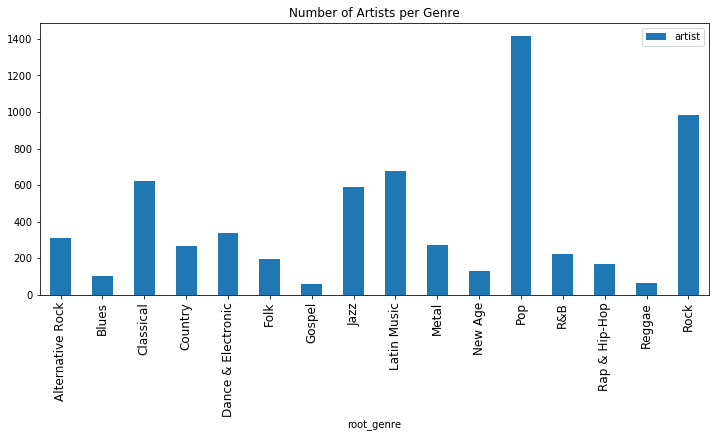

In [69]:
genre = cleanResult.groupby('root_genre').root_genre.nunique()
genre = cleanResult[['root_genre', 'artist']]
genre
d=genre.sort_values('root_genre', ascending=False).drop_duplicates('artist').sort_index()
grouped_data=d['artist'].groupby([genre['root_genre']]).count()
c = pd.DataFrame(grouped_data)
c
c['root_genre'] = c.index.get_level_values('root_genre')


f = plt.figure(figsize=(12,5))
c.plot(kind = 'bar',ax=f.gca()) 
plt.title('Number of Artists per Genre', color='black')

** We see that pop has maximum number of artists **

In [70]:
cleanResult['firstRelease'] = 0
cleanResult['overal'] = 0
list = cleanResult[['first_release_year']].apply(pd.to_numeric)
cleanResult['firstRelease'] = list
list1 = cleanResult[['overall']].apply(pd.to_numeric)
cleanResult['overal'] = list1
cleanResult.head()

,_id_x,reviewerID,amazon_id,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary,...,root_genre,title,artist,label,artist_url,first_release_year,songs,price,firstRelease,overal
195,ObjectId(58b362c054e8aa4aa9415683),A2I91CUY72DWU1,1557252920,"Rev. Ben Cox ""revben""","[13,13]",1274486400,When I was in Music School at Stetson Universi...,5,"05 22, 2010",A Great Teaching tool,...,Classical,Learning About Gregorian Chant,Monastic Choir of Solesmes,Solesmes,/s?ie=UTF8&field-artist=Monastic+Choir+of+Sole...,2002,"[{""mbid"":""05c87acd-bd9b-431c-82e0-3f23f5679fa5...",15,2002.0,5
1633,ObjectId(58b362c154e8aa4aa9415c21),A2ZMSGTCOKKFEI,5557530584,"80363 ""80363""","[0,0]",1221177600,I thought cds where all the songs rock were a ...,5,"09 12, 2008",UNBELIEVABLE!!!,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,5
1634,ObjectId(58b362c154e8aa4aa9415c22),A11RD5YOMUNFJ8,5557530584,Abbey Brown,"[1,1]",1235779200,"Even though I am not a Christian, Flyleaf is o...",4,"02 28, 2009",Fully Alive,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,4
1635,ObjectId(58b362c154e8aa4aa9415c23),A21AMFQK5SGWTC,5557530584,"Adipocere ""adipocere""","[0,0]",1154563200,"The video for ""I'm so sick"" grabs you, shakes ...",3,"08 3, 2006",Flyleaf: Don't judge a group by its video,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,3
1636,ObjectId(58b362c154e8aa4aa9415c24),A343M1PHQI1QYL,5557530584,A. D. Ramos,"[1,2]",1219449600,This CD was surprisingly better than I though...,5,"08 23, 2008",Music like I haven't heard in a while,...,Metal,Flyleaf,Flyleaf,Octone,/Flyleaf/e/B00197I5QO,2004,"[{""mbid"":""0fdfda79-6bdf-4a16-8a49-5fe5ca52d1a1...",13.99,2004.0,5


In [71]:
resultsort1= pd.core.frame.DataFrame({'Count' : cleanResult.groupby('firstRelease').reviewerName.nunique()}).reset_index()
resultsort1.head()



,firstRelease,Count
0,1890.0,11
1,1912.0,1
2,1933.0,1
3,1936.0,1
4,1940.0,8


****************

We want to see if what is the trend for reviews. We will plot a graph that shows the no of. reviews for the release year of the albums. This data shows us the no. of reviews given to the albums released in a particular year.
*****************


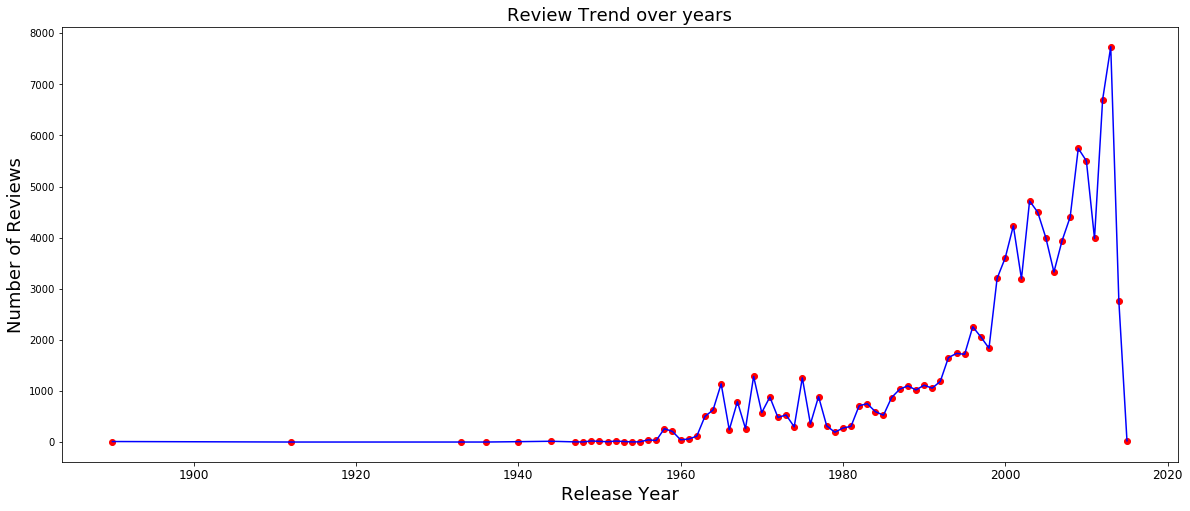

In [72]:
plt.figure(figsize=(20,8))
plt.plot(resultsort1.firstRelease,resultsort1.Count, "o", color ='r' )
plt.plot(resultsort1.firstRelease,resultsort1.Count, 'k-', color ='b')
plt.xlabel('Release Year',fontsize=18)
plt.ylabel('Number of Reviews',fontsize=18)
plt.title('Review Trend over years',fontsize=18)

** Above plot shows the gradual increase in the reviews from 1890 to 2015 **

***********



**Get genre, artist and release years seperately in Series to be used for fact discoveries:**

In [79]:
genre = cleanResult.groupby('root_genre').root_genre.nunique()
genre

root_genre
Alternative Rock      1
Blues                 1
Classical             1
Country               1
Dance & Electronic    1
Folk                  1
Gospel                1
Jazz                  1
Latin Music           1
Metal                 1
New Age               1
Pop                   1
R&B                   1
Rap & Hip-Hop         1
Reggae                1
Rock                  1
Name: root_genre, dtype: int64

In [16]:
artist = cleanResult.groupby('artist').artist.nunique()
artist.count()

6415

In [17]:
firstRelease = cleanResult.groupby('firstRelease').firstRelease.nunique()
firstRelease.count()

75

**************

Finding artists and the average ratings they got over the years and making a scatter plot

In [18]:
avgRating = cleanResult.groupby(['artist'])['overal'].mean()
avgRating = pd.DataFrame(avgRating)
grouped = avgRating.groupby(['overal']).groups
grouped

{1.0: Index([u'Adam & The Ants', u'Amandine Beyer', u'Barney', u'Ben Webster',
        u'Billy Strayhorn', u'Bob Kevoian', u'Chubby Checker',
        u'Courtney Barnett', u'Dispatch', u'Doobie Brothers', u'E.O.N. Project',
        u'El Gran Combo De Pue', u'Enrique Iglesias', u'Evelyn Vollmer',
        u'Forté', u'Franco Micalizzi', u'Freddie & The Dreamers',
        u'Global Stage Orchestra', u'Jeff Martin', u'Pro', u'R.B. Greaves',
        u'Searchers', u'Shelter', u'Smooth Jazz All Stars', u'Snew',
        u'Sunstorm & Joe Lynn Turner', u'The Dwarves',
        u'The Marshall Tucker Band', u'Thomas De Hartmann', u'Tina Turner',
        u'Trini Lopez', u'Vinnie Colaiuta', u'Viola Wills', u'Vogues',
        u'Wolfgang Dauner'],
       dtype='object', name=u'artist'),
 1.5: Index([u'Alicia Keys', u'Precious Death', u'Toots & The Maytals',
        u'Walker Hezekiah'],
       dtype='object', name=u'artist'),
 1.6666666666666667: Index([u'Aborted', u'Liquid Soul', u'Monna Bell'], dtype='ob

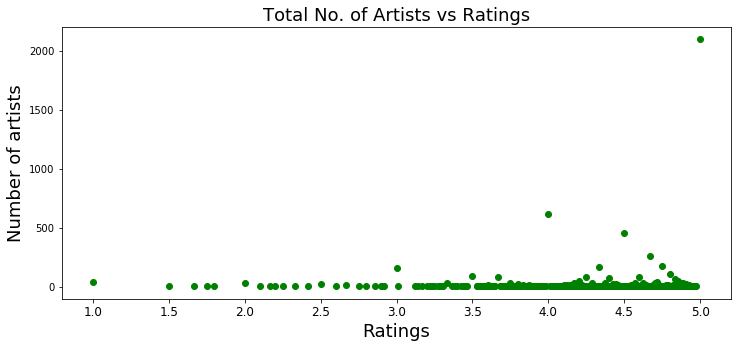

In [74]:
keys = grouped.keys()
values = grouped.values()
plt.figure(figsize=(12,5))
plt.xlabel('Ratings',fontsize=18)
plt.ylabel('Number of artists',fontsize=18)
plt.title('Total No. of Artists vs Ratings',fontsize=18)
plt.scatter( [float(k) for k in keys],[ len(v) for v in values], color = 'g')

#avgRating.plot(kind = 'line')

** From the scatter plot we see maximum number of artists had 5.0 rating ( hence displaying how that information could affect our analysis) **
**********


********

#### Plotting the highest rated Genre:

In [59]:
avgGenre = cleanResult.groupby(['root_genre'])['overal'].mean()
avgGenre= pd.DataFrame(avgGenre)
avgGenre

,overal
root_genre,
Alternative Rock,4.456658
Blues,4.630872
Classical,4.514572
Country,4.650336
Dance & Electronic,4.436923
Folk,4.594954
Gospel,4.572581
Jazz,4.537946
Latin Music,4.556357


We are finding the total no of ratings per genre to see the most popular genre

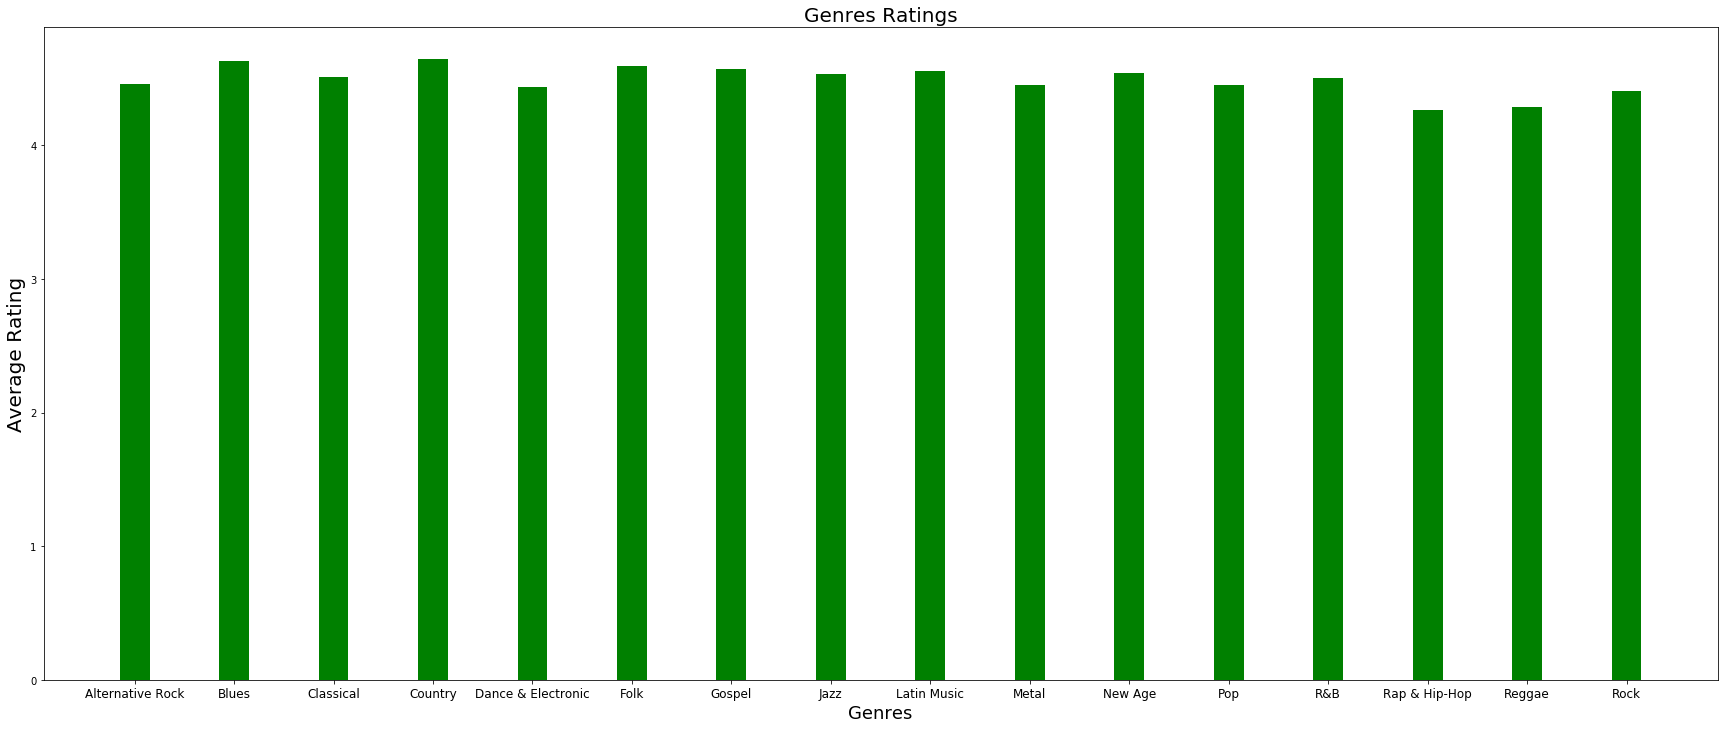

In [58]:
avgGenre = cleanResult.groupby(['root_genre'])['overal'].mean()
avgGenre= pd.DataFrame(avgGenre)
avgGenre['root_genre'] = avgGenre.index.get_level_values('root_genre')
objects = avgGenre['root_genre']
y_pos = np.arange(len(objects))
plt.figure(figsize=(30,12))
plt.xticks(y_pos, objects)
plt.rcParams['xtick.labelsize']=12
plt.bar(y_pos,avgGenre.overal,width=0.3,color ='g')

#plt.plot(a.firstRelease,a.overal, 'k-', color ='b')
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Average Rating',fontsize=20)
plt.title('Genres Ratings',fontsize=20)

** Most popular genre in data collected from 1890 to 2015 is actually Blues (contradictory to popular belief - Rock)**

***********

To find the overall ratings of various genres per Year
**********


In [75]:
releasePop = cleanResult.groupby(['firstRelease','root_genre'])['overal'].mean()
releasePop



firstRelease  root_genre        
1890.0        Classical             3.272727
1912.0        Pop                   5.000000
1933.0        Jazz                  3.000000
1936.0        Jazz                  5.000000
1940.0        Classical             4.875000
1944.0        Classical             4.437500
1947.0        Pop                   5.000000
1948.0        Jazz                  4.333333
1949.0        Jazz                  4.333333
              Pop                   4.555556
1950.0        Jazz                  4.833333
              Pop                   2.000000
1951.0        Classical             4.500000
              Folk                  5.000000
              Pop                   4.000000
1952.0        Jazz                  4.000000
              Pop                   4.578947
1953.0        Classical             4.142857
              Jazz                  4.500000
1954.0        Jazz                  5.000000
1955.0        Classical             5.000000
              Folk    

**Ratings of genres in 1970**

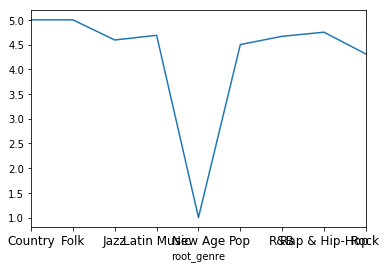

In [62]:

releasePop[1970].plot()

**Ratings of genres in 2015**

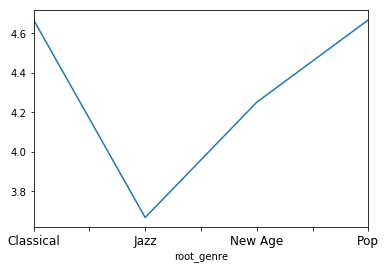

In [63]:
releasePop[2015].plot(kind = 'line')

** Theses two graphs show the rise and fall of Jazz music (1970 - 2015)** 

** Next we see Price of the albums is increasing as the years pass by**

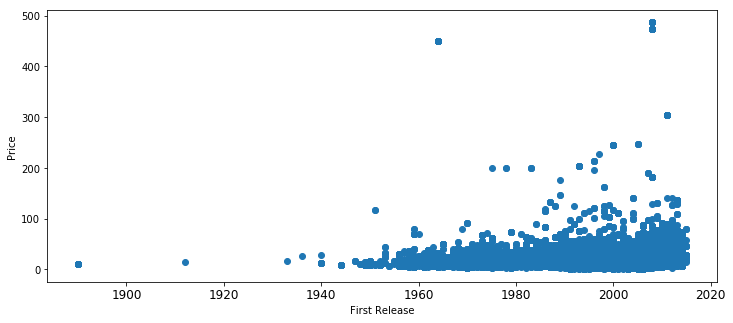

In [39]:
f1=cleanResult[['firstRelease']]
f2=cleanResult[['price']]
plt.figure(figsize=(12,5))
plt.xlabel('First Release')
plt.ylabel('Price')

plt.scatter(f1,f2)
plt.show()

**We want to look at what rating a particular artist has been receiving over the years. We would take an artist and take the average of the rating that the artist has received for an album released in a particular year.**



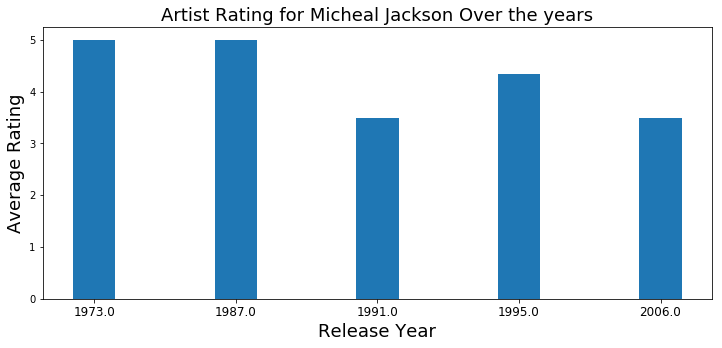

In [76]:
cleanResult = cleanResult.sort_values(['firstRelease'])

cleanResult
a = cleanResult[cleanResult['artist']=='Michael Jackson']
a=a['overal'].groupby([a['artist'],a['firstRelease']]).mean()
a = pd.DataFrame(a)
#avgRating.head()

a['artist'] = a.index.get_level_values('artist')
a['firstRelease'] = a.index.get_level_values('firstRelease')
objects = a['firstRelease']
y_pos = np.arange(len(objects))
plt.figure(figsize=(12,5))
plt.xticks(y_pos, objects)
plt.bar(y_pos,a.overal,width=0.3)

#plt.plot(a.firstRelease,a.overal, 'k-', color ='b')
plt.xlabel('Release Year',fontsize=18)
plt.ylabel('Average Rating',fontsize=18)
plt.title('Artist Rating for Micheal Jackson Over the years',fontsize=18)

***********

Now we have almost everything but we want to see what would is the trend of a particular genre and we can plot a trend line for that.
*************


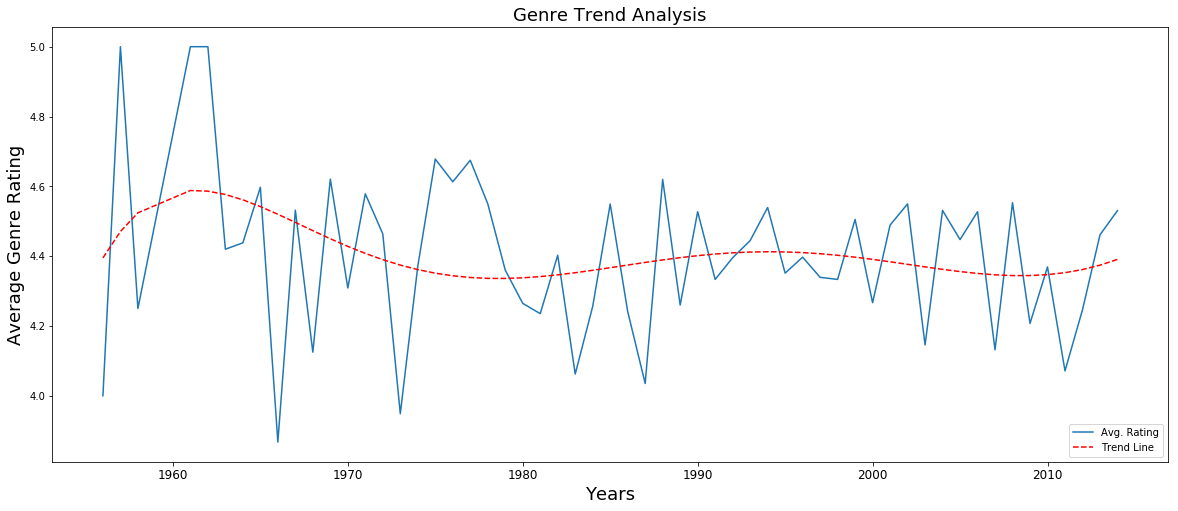

In [77]:
#releasePop = cleanResult.groupby(['firstRelease','root_genre'])['overal'].mean()
releasePop=cleanResult['overal'].groupby([cleanResult['firstRelease'],cleanResult['root_genre']]).mean()

releasePop = pd.DataFrame(releasePop)

releasePop['root_genre'] = releasePop.index.get_level_values('root_genre')
releasePop['firstRelease'] = releasePop.index.get_level_values('firstRelease')
releasePop1 = releasePop[releasePop['root_genre']=='Rock']
releasePop2 = releasePop[releasePop['root_genre']=='Pop']
#releasePop.plot()
plt.figure(figsize=(20,8))
plt.plot(releasePop1.firstRelease,releasePop1.overal, label='Avg. Rating')
plt.xlabel('Years',fontsize=18)
plt.ylabel('Average Genre Rating',fontsize=18)
plt.title('Genre Trend Analysis',fontsize=18)

#plt.figure(figsize=(20,8))
# plt.plot(releasePop2.firstRelease,releasePop2.overal, label='Avg. Rating')
# plt.xlabel('Years',fontsize=18)
# plt.ylabel('Average Genre Rating',fontsize=18)
# plt.title('Genre Trend Analysis',fontsize=18)




z=np.polyfit(releasePop1.firstRelease,releasePop1.overal,10)
p = np.poly1d(z)
plt.plot(releasePop1.firstRelease,p(releasePop1.firstRelease),"r--",label='Trend Line')
plt.legend(loc=4)
plt.show()

# Other graphical visualizations

** Finding the most popular artist as per their ratings**

<img src="2.png">